In [1]:
import pandas as pd
import datetime
import os
import sys
from plotnine import *

In [2]:
# load data for covide cases
daily_cases = pd.read_csv("./data/us-counties-covid-cases.csv")
daily_cases = daily_cases[daily_cases["state"] == "North Carolina"]
daily_cases.head()

,date,county,state,fips,cases,deaths
483,2020-03-03,Wake,North Carolina,37183.0,1,0.0
520,2020-03-04,Wake,North Carolina,37183.0,1,0.0
567,2020-03-05,Wake,North Carolina,37183.0,1,0.0
630,2020-03-06,Chatham,North Carolina,37037.0,1,0.0
631,2020-03-06,Wake,North Carolina,37183.0,1,0.0


In [3]:
# load population data
pop =  pd.read_excel("./co-est2019-annres.xlsx",  header=[0,1,2,3])
pop.columns = pop.columns.droplevel([0,1,2])
pop.rename(columns={"Unnamed: 0_level_3": "Geographic Area"}, inplace = True)
pop["Geographic Area"] = pop["Geographic Area"].str.replace('.','', regex=True)
# subset population data to selected counties
pop = pop[pop['Geographic Area'].str.contains("Mecklenburg County, North Carolina") | pop['Geographic Area'].str.contains("Wake County, North Carolina")]
# use 2019 population
pop = pop.iloc[:, [0] + [-1]]
pop

,Geographic Area,2019
1950,"Mecklenburg County, North Carolina",1110356.0
1982,"Wake County, North Carolina",1111761.0


#### Top 2 counties by 2019 population
* Mecklenburg County (Charlotte) - 1,110,356
* Wake County (Raleigh) - 1,111,761

* NC Statewide Stay at Home Order (Mar 27, 2020): 
https://www.ncdhhs.gov/news/press-releases/governor-cooper-announces-statewide-stay-home-order-until-april-29

In [4]:
# set comparison period to be 14 days
numdays = 21

In [5]:
# retrieve policy date for Stay at Home Order
policy = datetime.datetime.strptime('27032020', "%d%m%Y").date()
date_before = [policy - datetime.timedelta(days=x) for x in range(numdays+1)]
date_after = [policy + datetime.timedelta(days=x) for x in range(numdays+1)]
date_list = date_before + date_after

In [6]:
### Mecklenburg County ###
##########################

daily_meck = daily_cases[daily_cases["county"] == "Mecklenburg"].copy()
daily_meck["date"] = pd.to_datetime(daily_meck["date"])
daily_meck_timed = daily_meck.loc[daily_meck["date"].isin(date_list)]

# covering a total of 43 days (21 + 21 + 1)
daily_meck_timed

,date,county,state,fips,cases,deaths
1532,2020-03-12,Mecklenburg,North Carolina,37119.0,2,0.0
1826,2020-03-13,Mecklenburg,North Carolina,37119.0,2,0.0
2180,2020-03-14,Mecklenburg,North Carolina,37119.0,2,0.0
2592,2020-03-15,Mecklenburg,North Carolina,37119.0,4,0.0
3054,2020-03-16,Mecklenburg,North Carolina,37119.0,4,0.0
3574,2020-03-17,Mecklenburg,North Carolina,37119.0,7,0.0
4181,2020-03-18,Mecklenburg,North Carolina,37119.0,11,0.0
4912,2020-03-19,Mecklenburg,North Carolina,37119.0,13,0.0
5766,2020-03-20,Mecklenburg,North Carolina,37119.0,28,0.0
6763,2020-03-21,Mecklenburg,North Carolina,37119.0,41,0.0


In [7]:
df_meck = daily_meck_timed.copy()
# fill in county specific population and create standardized covide cases column
df_meck['pop'] = pop.iloc[:1, 1].values[0]
df_meck['cases_standardized'] = df_meck['cases']/df_meck['pop']*10000

# create indicator variable - pre and post policy annoucement
df_meck['treated'] = (df_meck.date > '2020-03-27').astype(int)
df_meck.sample(5)

,date,county,state,fips,cases,deaths,pop,cases_standardized,treated
3054,2020-03-16,Mecklenburg,North Carolina,37119.0,4,0.0,1110356.0,0.036024,0
52756,2020-04-12,Mecklenburg,North Carolina,37119.0,954,12.0,1110356.0,8.591839,1
16989,2020-03-28,Mecklenburg,North Carolina,37119.0,299,0.0,1110356.0,2.692830,1
10374,2020-03-24,Mecklenburg,North Carolina,37119.0,104,0.0,1110356.0,0.936637,0
11818,2020-03-25,Mecklenburg,North Carolina,37119.0,170,0.0,1110356.0,1.531040,0


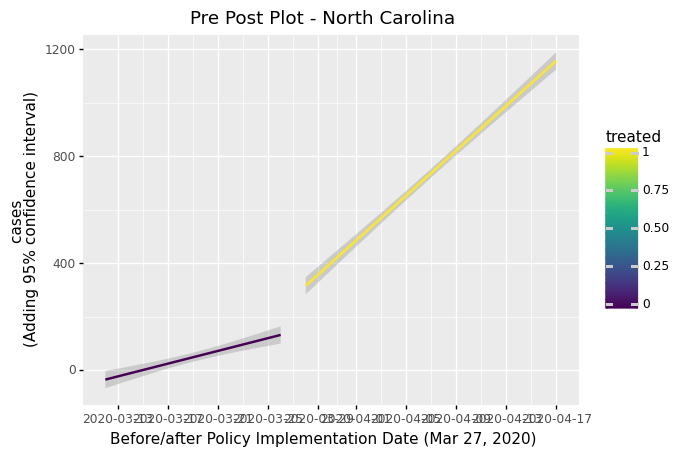

<ggplot: (8787972743015)>

In [8]:
(ggplot() +
    geom_smooth(df_meck[df_meck['date'] < '2020-03-27'], 
                aes(x='date', y='cases', color='treated'), method='lm') + 
    geom_smooth(df_meck[df_meck['date'] > '2020-03-27'], 
                aes(x='date', y='cases', color='treated'), method='lm')
    + xlab('Before/after Policy Implementation Date (Mar 27, 2020)') 
    + ylab(str("cases") + ' \n(Adding 95% confidence interval)')
    #+ scale_x_continuous(breaks=range(lower_lim,upper_lim,1))
    + labs(title=str("Pre Post Plot - North Carolina")))

In [9]:
### Wake County ###
###################

daily_wake = daily_cases[daily_cases["county"] == "Wake"].copy()
daily_wake["date"] = pd.to_datetime(daily_wake["date"])
daily_wake_timed = daily_wake.loc[daily_wake["date"].isin(date_list)]

# covering a total of 29 days (14 + 1 + 1)
daily_wake_timed.head()

,date,county,state,fips,cases,deaths
631,2020-03-06,Wake,North Carolina,37183.0,1,0.0
720,2020-03-07,Wake,North Carolina,37183.0,1,0.0
827,2020-03-08,Wake,North Carolina,37183.0,1,0.0
954,2020-03-09,Wake,North Carolina,37183.0,6,0.0
1105,2020-03-10,Wake,North Carolina,37183.0,6,0.0


In [10]:
df_wake = daily_wake_timed.copy()
# fill in county specific population and create standardized covide cases column
df_wake['pop'] = pop.iloc[1:2, 1].values[0]
df_wake['cases_standardized'] = df_wake['cases']/df_wake['pop']*10000

# create indicator variable - pre and post policy annoucement
df_wake['treated'] = (df_wake.date > '2020-03-27').astype(int)
df_wake.sample(5)

,date,county,state,fips,cases,deaths,pop,cases_standardized,treated
32287,2020-04-04,Wake,North Carolina,37183.0,283,0.0,1111761.0,2.545511,1
631,2020-03-06,Wake,North Carolina,37183.0,1,0.0,1111761.0,0.008995,0
1105,2020-03-10,Wake,North Carolina,37183.0,6,0.0,1111761.0,0.053968,0
58171,2020-04-14,Wake,North Carolina,37183.0,501,0.0,1111761.0,4.506364,1
720,2020-03-07,Wake,North Carolina,37183.0,1,0.0,1111761.0,0.008995,0


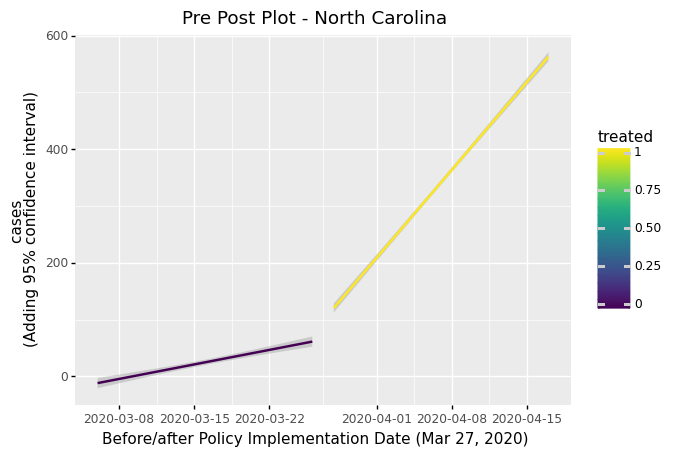

<ggplot: (8787951638483)>

In [11]:
(ggplot() +
    geom_smooth(df_wake[df_wake['date'] < '2020-03-27'], 
                aes(x='date', y='cases', color='treated'), method='lm') + 
    geom_smooth(df_wake[df_wake['date'] > '2020-03-27'], 
                aes(x='date', y='cases', color='treated'), method='lm')
    + xlab('Before/after Policy Implementation Date (Mar 27, 2020)') 
    + ylab(str("cases") + ' \n(Adding 95% confidence interval)')
    #+ scale_x_continuous(breaks=range(lower_lim,upper_lim,1))
    + labs(title=str("Pre Post Plot - North Carolina")))

In [12]:
df_concat = pd.concat([df_meck,df_wake],ignore_index=True)
df_concat.sample(5)

,date,county,state,fips,cases,deaths,pop,cases_standardized,treated
9,2020-03-21,Mecklenburg,North Carolina,37119.0,41,0.0,1110356.0,0.369251,0
79,2020-04-17,Wake,North Carolina,37183.0,566,3.0,1111761.0,5.091022,1
38,2020-03-07,Wake,North Carolina,37183.0,1,0.0,1111761.0,0.008995,0
48,2020-03-17,Wake,North Carolina,37183.0,17,0.0,1111761.0,0.152911,0
67,2020-04-05,Wake,North Carolina,37183.0,304,0.0,1111761.0,2.734401,1


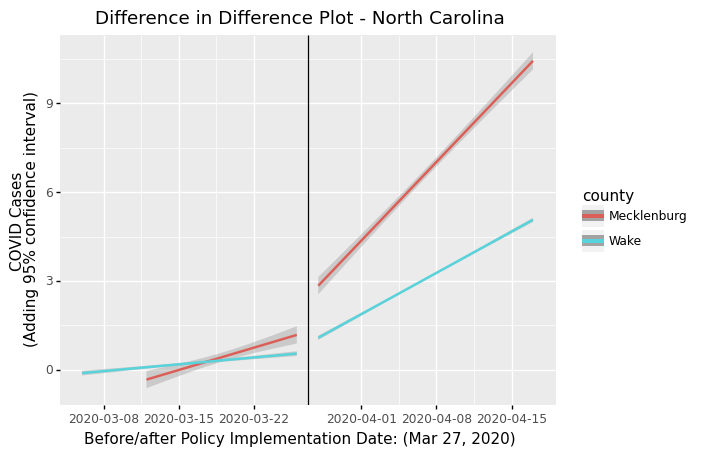

<ggplot: (8787951800245)>

In [13]:
(ggplot() +
    geom_smooth(df_meck[df_meck['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='county'), method='lm') + 
    geom_smooth(df_meck[df_meck['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='county'), method='lm') + 
        
    geom_smooth(df_wake[df_wake['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='county'), method='lm') + 
    geom_smooth(df_wake[df_wake['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='county'), method='lm')
    + geom_vline(xintercept = '2020-03-27')
    + xlab('Before/after Policy Implementation Date: (Mar 27, 2020)')
    + ylab(str("COVID Cases") + ' \n(Adding 95% confidence interval)')
    + labs(title=str("Difference in Difference Plot - North Carolina")))